In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')




In [22]:
df1 = pd.read_csv("./raw_data2.csv", encoding='cp949')
df1.columns

Index(['날짜', '달러원종가', '달러원시가', 'CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가'],
      dtype='object')

In [23]:
df = pd.read_csv("./10년 BIR 지수 Yr.2010.csv", encoding='cp949')
df.columns=['날짜', 'BIR']
df.columns

Index(['날짜', 'BIR'], dtype='object')

In [24]:
df2 =pd.merge(df1,df,how='inner',on='날짜')


In [25]:
df2

,날짜,달러원종가,달러원시가,CD91,WTI가,달러위안화,달러엔,달러인덱스,유로달러,유로인덱스,콜금리,코스피종가,BIR
0,2010-01-04,"1,150.00","1,164.07",2.88,81.64,6.8285,92.47,92.3566,1.4413,106.23,1.980,1696.140015,2.38
1,2010-01-05,"1,140.20","1,151.00",2.88,81.47,6.8268,91.58,92.2236,1.4369,105.82,1.980,1690.619995,2.34
2,2010-01-06,"1,129.20","1,140.20",2.88,83.25,6.8278,92.38,92.0941,1.4413,106.11,1.960,1705.319946,2.37
3,2010-01-07,"1,138.20","1,129.20",2.88,82.69,6.8281,93.45,92.3684,1.4318,105.84,1.990,1683.449951,2.41
4,2010-01-08,"1,128.25","1,135.50",2.88,82.91,6.8276,92.68,92.1485,1.4413,106.18,2.000,1695.260010,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,2023-09-11,"1,325.49","1,336.34",3.72,87.42,7.2882,146.58,121.8185,1.0748,124.19,3.602,2556.879883,2.35
3314,2023-09-12,"1,326.15","1,326.05",3.73,88.94,7.2910,147.08,121.7721,1.0752,124.21,3.597,2536.580078,2.34
3315,2023-09-13,"1,326.59","1,326.72",3.75,88.80,7.2700,147.45,121.5454,1.0728,124.25,3.592,2534.699951,2.35
3316,2023-09-14,"1,329.52","1,328.20",3.76,90.67,7.2770,147.47,121.7192,1.0641,124.19,3.587,2572.889893,2.34


In [26]:
# df2.infer_objects()
# df2['날짜']=df2['날짜'].str.replace(' ','')
# df2.columns

<Axes: >

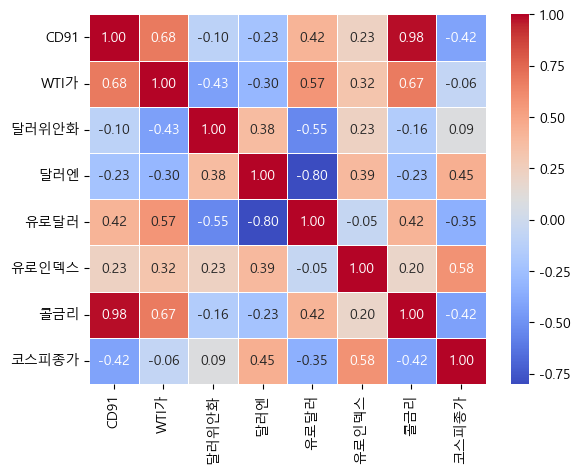

In [27]:
corr_data = df2[['달러원종가', '달러원시가', 'CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']].corr()

sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')

In [31]:
df2[['CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']].corr()

,CD91,WTI가,달러위안화,달러엔,유로달러,유로인덱스,콜금리,코스피종가
CD91,1.000000,0.680702,-0.098803,-0.227183,0.421961,0.232864,0.984658,-0.419368
WTI가,0.680702,1.000000,-0.429906,-0.301779,0.568865,0.320918,0.672536,-0.063151
달러위안화,-0.098803,-0.429906,1.000000,0.379493,-0.547355,0.231063,-0.155625,0.086206
달러엔,-0.227183,-0.301779,0.379493,1.000000,-0.800643,0.390293,-0.225653,0.449380
유로달러,0.421961,0.568865,-0.547355,-0.800643,1.000000,-0.048744,0.418397,-0.345778
유로인덱스,0.232864,0.320918,0.231063,0.390293,-0.048744,1.000000,0.195612,0.584802
콜금리,0.984658,0.672536,-0.155625,-0.225653,0.418397,0.195612,1.000000,-0.421469
코스피종가,-0.419368,-0.063151,0.086206,0.449380,-0.345778,0.584802,-0.421469,1.000000
